In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 14})

# Blackbody Radiation
Max Planck in 1901 published his work modeling the light emitted from objects due to their temperature. He found that the spectral intensity (energy per photon wavelength) follows the temperature and wavelength dependent function

$$u(\lambda)=\frac{8\pi hc}{\lambda^5\left(e^{\frac{hc}{\lambda kT}}-1\right)}$$

The total power of light emitted comes from integrating the equation above and goes as the surface area of the blackbody and its temperature to the fourth power.

$$P=\epsilon \sigma AT^4$$

where $\epsilon$ is a unitless variable describing the efficiency of a blackbody. Think of it as a percentage with 1 being a perfect blackbody. The value $\sigma$ is a physical constant made up of other physical constants

$$\sigma = \frac{2\pi^5k^4}{15h^3c^2} = 5.67\times 10^{-8} {\rm\frac{W}{m^2K^4}}$$

The wavelength of maximum emission can be found

$$\lambda_{max} = \frac{2.898\times 10^{-3}}{T}~{\rm meters}$$

Let's look at the power spectrum function graphically and then, we will see how we can understand the other equations in terms of the spectrum.

In the next cell, 
1. Define the constants $h, c, k, T$
    * Start with an object at room temperature ($T=300{\rm K}$).
2. Create an array of wavelengths using either `np.arange(begin, end, step)`
    * You will be adjusting this array when you see the graph.
    * To make the axis look nice, we make the wavelength array in nm while doing the calculation using meters?
3. Use the constants and the array of wavelengths to calculate the function for the spectrum.
    * You may want to break it into pieces, calculating the exponential part in parentheses separate from the rest.
    * The exponential function is called using `np.exp(x)`.
4. Plot the function recalling commands such as
    * `plt.plot(x, y, 'marker', label='label such as temperature')`
    * `plt.xlabel('xlabel (units)')`
    * `plt.ylabel('ylabel (units)')`
    * `plt.legend()`
    * `plt.show()`
    
<font color="red">What happens to the spectrum as the temperature increases? Try temperatures between 300 and 1000 K.</font>

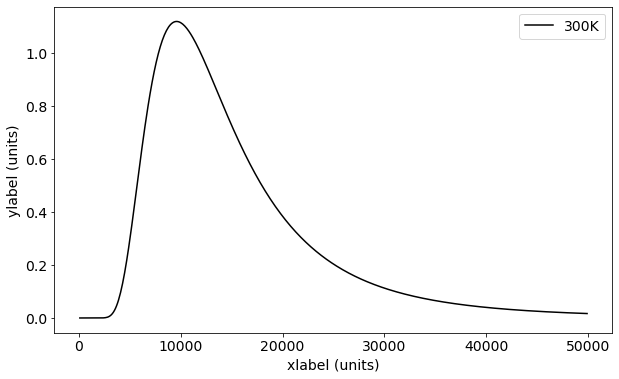

In [23]:
#Constants in SI units
h = #Joule-seconds
c = #meters/second
k = #Joules/Kelvin
T = #Kelvin

#The blackbody spectrum function
f = lambda x: #Enter the function here

wl = np.arange(begin, end, step)#(begin, end, step)#wavelengths
u_wl = #create a spectrum by calling the function with properly scaled wavelengths

plt.plot(x, y, '-k', label='300K')
plt.xlabel('xlabel (units)')
plt.ylabel('ylabel (units)')
plt.legend()
plt.show()

## Effect of Temperature

Let's plot the spectrum for several temperatures ranging from 1000 K to 10000 K. <font color="red">Everything in the next code cell below is done, just click shift-enter. What do you notice about the energy spectrum as temperature increases?</font>

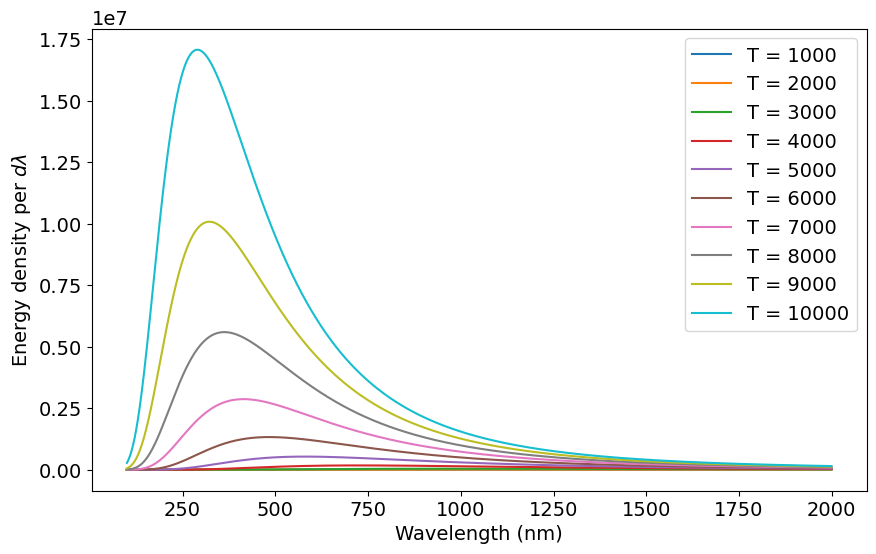

In [23]:
#Constants in SI units
h = 6.626e-34#Joule-seconds
c = 3e8#meters/second
k = 1.38e-23#Joules/Kelvin
T1 = 1000    # In Kelvin
T2 = 11000
dT = 1000
x = np.arange(100, 2000, 1)

#The blackbody spectrum function with temp as a variable
f = lambda x, T: 8*np.pi*h*c/(x*1e-9)**5*1/(np.exp(h*c/(x*1e-9*k*T))-1)#(k*T)**4/(h*c)**3*(x**3/(np.exp(x)-1))

for i in range(T1,T2,dT):
    y = f(x, i)
    lab = "T = " + str(i)
    plt.plot(x_nm, y, label=lab)

plt.ylabel(r"Energy density per $d\lambda$")
plt.xlabel("Wavelength (nm)")
#plt.ylim(0,10e5)
plt.legend()
plt.show()

## Integrate the Spectrum
We can integrate by using a Riemann sum. To do this we take the value of the spectrum at each wavelength and assume a rectangle centered at this y-value spans half of $\Delta\lambda$ downward and half upward. The rectangle then has an area $u(x)\cdot\Delta x$. We sum these rectangles over the spectrum (as much of the spectrum has significant contribution).

$$\int_0^\infty u(x)dx \approx \sum_i u(x_i)\cdot\Delta x$$

For $x$ created with `np.arange`, the $\Delta x$ is the third parameter.

* Make an wavelength array `x=np.arange(100, 10000, 1)`. We need a wide wavelength range to ensure convergence of the integral. Then, calculate a spectrum for a temperature, e.g., 1000 K is
    * `u = f(x, 1000)`
* Calculate the integral for these 10 temperatures using `np.sum(u_x * dx)`.
* Make an array of temperatures and integrals using

```python
T = np.array([T1, T2, ... T10])
uint = np.array([u1, u2, ... u10])
```

In [ ]:
#Make a wavelength array
x = 

#Make the spectrum for T
u = #f(x,T)

#Integrate the spectrum numerically
uint = #sum(u*dx)

#Print the integral
print (uint)

In [ ]:
T = np.array([1000, 2000, 3000, 4000])
uint = np.array([0.000753, 0.012055, 0.06103, 0.192886])

plt.plot(T, uint, 'ok', label="integrated spectrum")
plt.xlabel('Temperature (K)')
plt.ylabel('U/V')
plt.show()

### Fit and plot the results
The integral gives an energy per volume in this case.

$$\frac{U}{V} = CT^4$$

The code below will curve fit your results above to a power law

$$y = Cx^p$$

<font color="red">The code below works if you have the calculations above, just click shift-enter. We are expecting a $T^4$ dependence, where $C = 7.536\times 10^{-16}$ and $p=4$. Is this what we get?</font>

In [ ]:
def T4(x, C, p):
    return C*x**p

#Curve fit using the function above
fit_params, fit_cov = curve_fit(T4, T, uint, p0=(1e-8,1))
print(fit_params)

#Make arrays for the fit function
x_fit = np.arange(100,11000,100) #since it is a power law, we want lots of points to make it look smooth 
y_fit = T4(x_fit,fit_params[0],fit_params[1])

#plot the original data and the fit function
plt.plot(T, uint, 'ok')
plt.plot(x_fit, y_fit, '-k', label='fit')
plt.ylabel(r'$P/A (W/m^2)$')
plt.xlabel('Temperature (K)')
plt.show()